### StarAgile ASSIGNMENT 2 - Convolution Neural Networks - Level 1

### Assignment Submitted by VINAY M on 18-09-2023

- Convolution Neural Networks - CiFAR-10 Object Recognition Images

- Image Classification using CNN (Take a Use Case out of it)

- Dataset Link : https://drive.google.com/drive/folders/1sXPE_TVkIRNRsVXofJyjqxVtTuDgpRyW?usp=sharing
- (CiFAR 10 Dataset)

- What Kind Of Approach You Could Follow for your Problem Statements :

- Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, Training and Testing, Modeling, Accuracy

In [1]:
import pandas as pd
import numpy as np
import warnings
import os
import cv2
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading files and folders
train_labels = pd.read_csv('trainLabels.csv')
print("Number of training sample: ", train_labels.shape[0])

Number of training sample:  50000


In [3]:
imageLabels = sorted(train_labels["label"].unique())
imageLabels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
imageLabel_coded = {}
for key, value in enumerate(imageLabels):
    imageLabel_coded[f'{value}'] = key
imageLabel_coded

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [5]:
# Mapping Codes to Y values
train_labels['labelCode'] = train_labels['label'].map(imageLabel_coded)

In [6]:
train_labels

,id,label,labelCode
0,1,frog,6
1,2,truck,9
2,3,truck,9
3,4,deer,4
4,5,automobile,1
...,...,...,...
49995,49996,bird,2
49996,49997,frog,6
49997,49998,truck,9
49998,49999,automobile,1


In [7]:
y = train_labels['labelCode'].to_numpy()

In [8]:
y

array([6, 9, 9, ..., 9, 1, 1], dtype=int64)

In [9]:
# Preparing Images for Modelling

In [14]:
# Display number of images in train folder
folder_path = 'train'
files = os.listdir(folder_path)
image_count = 0
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tif', '.tiff']
for file in files:
    if os.path.isfile(os.path.join(folder_path, file)) and any(file.lower().endswith(ext) for ext in valid_extensions):
        image_count += 1
print(f"Number of image files in the folder: {image_count}")

Number of image files in the folder: 50000


In [18]:
img_path = 'train'

image_files = [f for f in os.listdir(img_path) if f.endswith('.jpg') or f.endswith('.png')]
resized_images = []
target_width = 32
target_height = 32

# Loop through the image files and resize them
for file in image_files:
    file_path = os.path.join(img_path, file)
    image = cv2.imread(file_path)
    resized_image = cv2.resize(image, (target_width, target_height))

    # Ensure the image has 3 color channels (RGB)
    if resized_image.shape[2] == 1:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

    # Append the resized image to the list
    resized_images.append(resized_image)

# Convert the list of resized images to a NumPy array
image_array = np.array(resized_images)

In [20]:
image_array.shape

(50000, 32, 32, 3)

In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

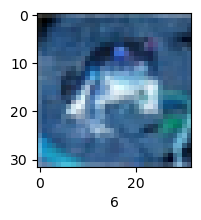

In [23]:
plot_sample(image_array, y, 0)

In [24]:
# Normalising Image Array
X = image_array / 255.0

In [26]:
# Checking X and Y Dimensions

In [29]:
X.shape

(50000, 32, 32, 3)

In [30]:
y.shape

(50000,)

In [31]:
X.shape[0] == y.shape[0]

True

In [32]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# importing the CNN Libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import MaxPool2D, Activation, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [35]:
# CNN Architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))),
model.add(MaxPooling2D((2, 2))),
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')),
model.add(MaxPooling2D((2, 2))),
model.add(Flatten()),
model.add(Dense(64, activation='relu')),
model.add(Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1094/1094 [==============================] - 50s 46ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 2/100
1094/1094 [==============================] - 50s 46ms/step - loss: 2.3016 - accuracy: 0.1020
Epoch 3/100
1094/1094 [==============================] - 49s 45ms/step - loss: 2.2990 - accuracy: 0.1084
Epoch 4/100
1094/1094 [==============================] - 50s 45ms/step - loss: 2.2934 - accuracy: 0.1156
Epoch 5/100
1094/1094 [==============================] - 50s 46ms/step - loss: 2.2829 - accuracy: 0.1207
Epoch 6/100
1094/1094 [==============================] - 50s 46ms/step - loss: 2.2661 - accuracy: 0.1342
Epoch 7/100
1094/1094 [==============================] - 50s 46ms/step - loss: 2.2393 - accuracy: 0.1538
Epoch 8/100
1094/1094 [==============================] - 51s 46ms/step - loss: 2.2017 - accuracy: 0.1701
Epoch 9/100
1094/1094 [==============================] - 51s 46ms/step - loss: 2.1524 - accuracy: 0.1998
Epoch 10/100
1094/1094 [==============================]

In [42]:
#Evaluation of Test Class
model.evaluate(X_test,y_test)

469/469 [==============================] - 8s 18ms/step - loss: 25.7485 - accuracy: 0.0985


[25.748497009277344, 0.0984666645526886]

In [43]:
# Accuracy Assessment
from sklearn.metrics import confusion_matrix , classification_report
probability = model.predict(X_test)
y_pred = np.argmax(probability, axis=1)
print("Classification Report: \n", classification_report(y_test, y_pred))

469/469 [==============================] - 8s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      0.11      0.10      1473
           1       0.09      0.10      0.10      1477
           2       0.10      0.10      0.10      1500
           3       0.11      0.10      0.10      1542
           4       0.10      0.10      0.10      1437
           5       0.09      0.09      0.09      1545
           6       0.10      0.10      0.10      1465
           7       0.10      0.12      0.11      1491
           8       0.10      0.10      0.10      1546
           9       0.09      0.08      0.09      1524

    accuracy                           0.10     15000
   macro avg       0.10      0.10      0.10     15000
weighted avg       0.10      0.10      0.10     15000



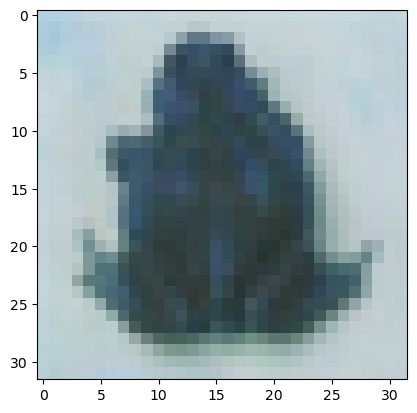

In [44]:
# randomly displaying one image
import random
maxrows = X_test.shape[0]
random_row = random.randint(1, maxrows)
test_image = X_test[random_row]
test_label = y_test[random_row]
plt.imshow(test_image)

In [47]:
test_image[0]

array([[0.69803922, 0.82352941, 0.89019608],
       [0.68627451, 0.81960784, 0.87843137],
       [0.71372549, 0.82352941, 0.87843137],
       [0.7372549 , 0.81960784, 0.86666667],
       [0.75294118, 0.83137255, 0.8627451 ],
       [0.76078431, 0.83529412, 0.86666667],
       [0.75686275, 0.83529412, 0.86666667],
       [0.76470588, 0.84313725, 0.87058824],
       [0.76862745, 0.83921569, 0.85882353],
       [0.75686275, 0.83921569, 0.84705882],
       [0.76470588, 0.83921569, 0.85098039],
       [0.78823529, 0.84313725, 0.85490196],
       [0.78431373, 0.83529412, 0.84705882],
       [0.77647059, 0.83529412, 0.83921569],
       [0.78039216, 0.84313725, 0.84313725],
       [0.77647059, 0.83921569, 0.84313725],
       [0.77647059, 0.83529412, 0.84313725],
       [0.78431373, 0.84313725, 0.85490196],
       [0.78823529, 0.84705882, 0.85882353],
       [0.78431373, 0.84705882, 0.85882353],
       [0.78823529, 0.84705882, 0.85882353],
       [0.78039216, 0.84705882, 0.85882353],
       [0.

In [49]:
predictions_probability = model.predict(test_image.reshape(-1, 32, 32, 3))
predicted_code = np.argmax(predictions_probability)
print("Predicted Code:", predicted_code)
print("Actual Code:", test_label)

1/1 [==============================] - 0s 97ms/step
Predicted Code: 1
Actual Code: 9


In [41]:
# Displaying Image Labels associated with probability values

In [50]:
labelNames = {}
for key, value in enumerate(imageLabels):
    labelNames[key] = f'{value}'

In [51]:
labelNames

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [52]:
predictions_probability = model.predict(test_image.reshape(-1, 32, 32, 3))
predicted_code = np.argmax(predictions_probability)
print("Predicted class:", labelNames[predicted_code])
print("Actual class:", labelNames[test_label])

1/1 [==============================] - 0s 61ms/step
Predicted class: automobile
Actual class: truck


1/1 [==============================] - 0s 65ms/step


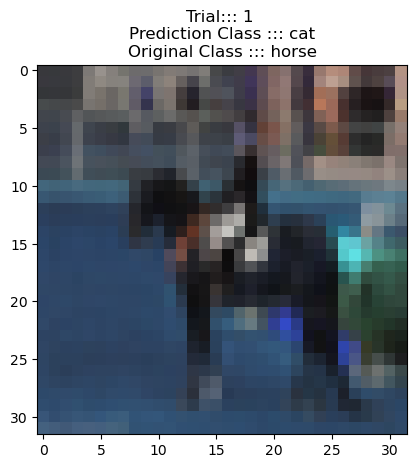

1/1 [==============================] - 0s 36ms/step


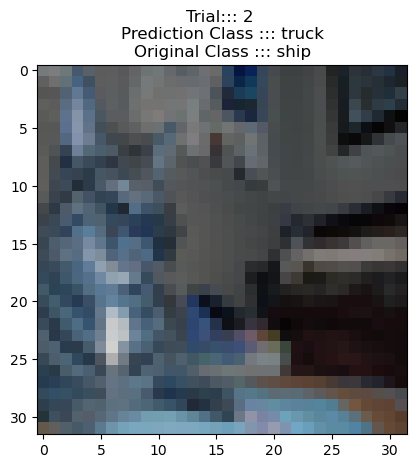

1/1 [==============================] - 0s 45ms/step


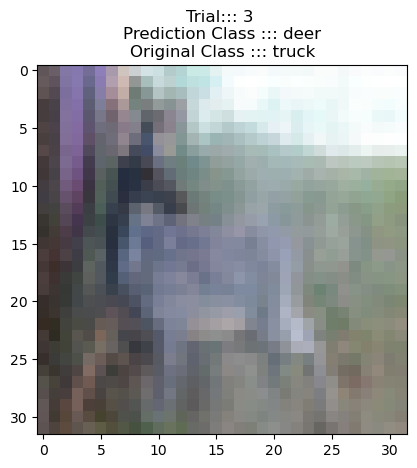

1/1 [==============================] - 0s 39ms/step


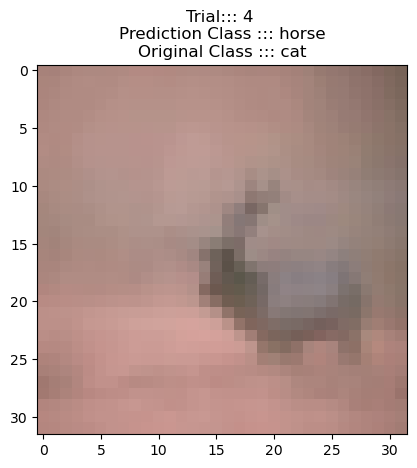

1/1 [==============================] - 0s 31ms/step


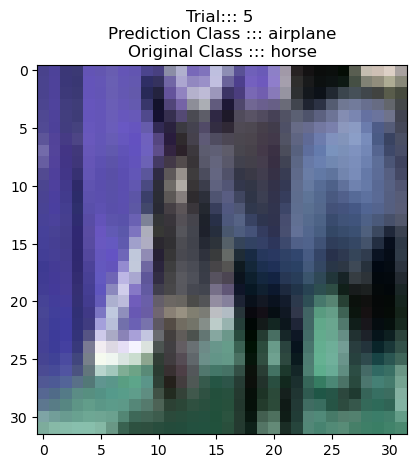

1/1 [==============================] - 0s 38ms/step


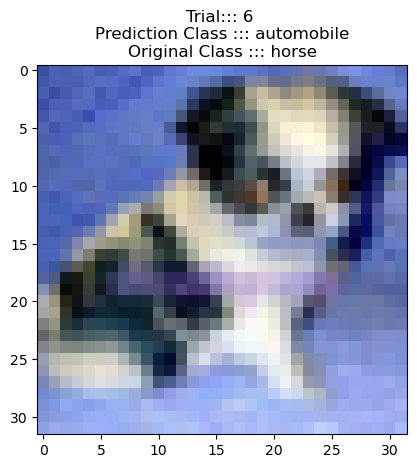

1/1 [==============================] - 0s 37ms/step


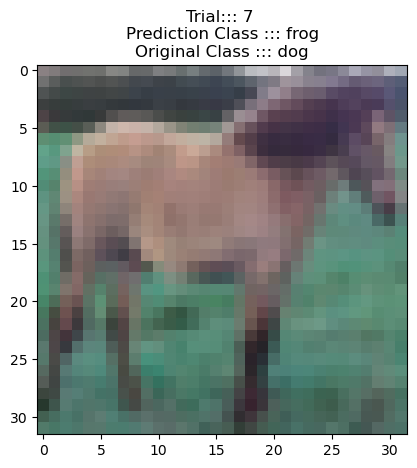

1/1 [==============================] - 0s 36ms/step


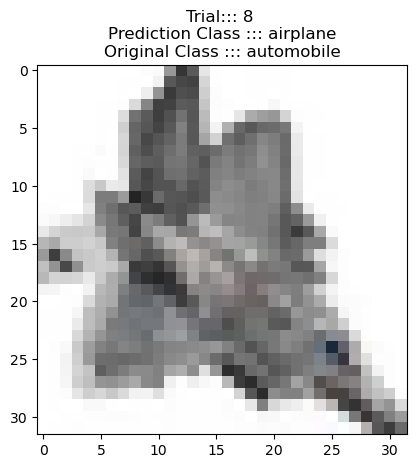

1/1 [==============================] - 0s 38ms/step


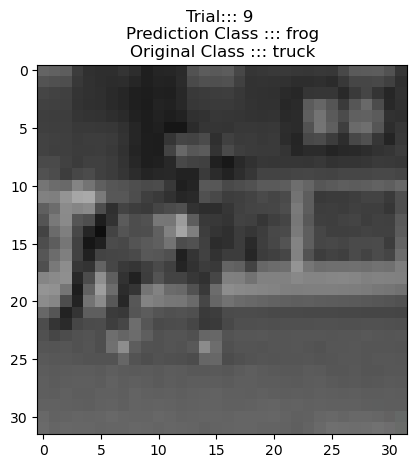

1/1 [==============================] - 0s 37ms/step


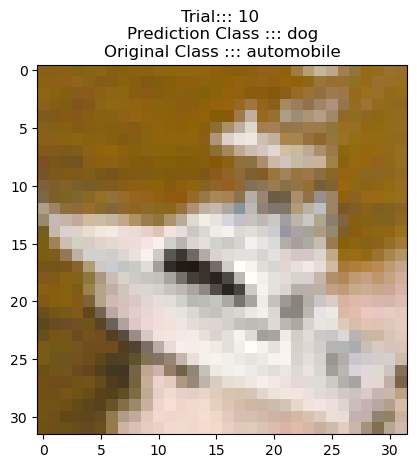

In [55]:
# Randomly Picking 10 test classes and predicting it
for i in range(1,11):
    maxrows = X_test.shape[0]
    
    random_image = random.randint(1, maxrows)
    
    test_image = X_test[random_image]
    
    test_label = y_test[random_image]
    
    predictions_probability = model.predict(test_image.reshape(-1, 32, 32, 3))
    
    predicted_code = np.argmax(predictions_probability)
    
    plt.imshow(test_image)
    
    plt.title(f'''Trial::: {i} 
Prediction Class ::: {labelNames[predicted_code]}
Original Class ::: {labelNames[test_label]}''')

    plt.show()

In [56]:
#Saving Model
from tensorflow.keras.models import load_model
model.save('CIFAR10MODEL.h5')

In [58]:
#Loading the model and Sample Submission as per the requirement
model = load_model('CIFAR10MODEL.h5')
folder_path = 'sample2000_images'

image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
file_names = []
predicted_classes = []
target_width = 32
target_height = 32

# Iterate through the image files and make predictions
for file in image_files:
    # Construct the full file path
    file_path = os.path.join(folder_path, file)

    # Read and preprocess the image
    image = cv2.imread(file_path)
    image = cv2.resize(image, (target_width, target_height))
    image = (image / 255.0).astype(np.float32)
    image = np.reshape(image, (1, target_width, target_height, 3))  # Reshape for model input

    # Make predictions using the model
    predictions = model.predict(image.reshape(-1, 32, 32, 3))

    # Interpret the predictions to obtain the predicted class
    predicted_class = np.argmax(predictions)

    # Append file name and predicted class to the lists
    value = labelNames[predicted_class]

    file_names.append(file)
    predicted_classes.append(value)

1/1 [==============================] - 0s 44ms/step
Predictions saved to sample2000_images.csv.


In [64]:
# Create a DataFrame to store the results
keys = file_names
values = predicted_classes
result = dict(map(lambda i,j : (i,j) , keys,values))
result

{'1.png': 'horse',
 '10.png': 'horse',
 '100.png': 'horse',
 '1000.png': 'horse',
 '1001.png': 'bird',
 '1002.png': 'horse',
 '1003.png': 'horse',
 '1004.png': 'bird',
 '1005.png': 'deer',
 '1006.png': 'automobile',
 '1007.png': 'horse',
 '1008.png': 'ship',
 '1009.png': 'ship',
 '101.png': 'cat',
 '1010.png': 'bird',
 '1011.png': 'bird',
 '1012.png': 'horse',
 '1013.png': 'bird',
 '1014.png': 'cat',
 '1015.png': 'airplane',
 '1016.png': 'automobile',
 '1017.png': 'horse',
 '1018.png': 'airplane',
 '1019.png': 'frog',
 '102.png': 'horse',
 '1020.png': 'dog',
 '1021.png': 'horse',
 '1022.png': 'frog',
 '1023.png': 'automobile',
 '1024.png': 'truck',
 '1025.png': 'horse',
 '1026.png': 'automobile',
 '1027.png': 'airplane',
 '1028.png': 'cat',
 '1029.png': 'truck',
 '103.png': 'dog',
 '1030.png': 'cat',
 '1031.png': 'dog',
 '1032.png': 'ship',
 '1033.png': 'dog',
 '1034.png': 'bird',
 '1035.png': 'horse',
 '1036.png': 'automobile',
 '1037.png': 'truck',
 '1038.png': 'deer',
 '1039.png': '

In [ ]:

output_csv_path = 'sample2000_images.csv'

# Save the results to a CSV file
results_df.to_csv(output_csv_path, index=False)

print(f"Predictions saved to {output_csv_path}.")

In [65]:
df = pd.DataFrame.from_dict(result, orient='index', columns=['Value'])
df.reset_index(inplace=True)
df.columns = ['Filename', 'Predicted']
print(df)

      Filename Predicted
0        1.png     horse
1       10.png     horse
2      100.png     horse
3     1000.png     horse
4     1001.png      bird
...        ...       ...
1995   995.png      deer
1996   996.png      frog
1997   997.png     truck
1998   998.png     truck
1999   999.png       dog

[2000 rows x 2 columns]


In [66]:
df.to_csv('sample2000submission.csv', index=False)

In [ ]:
# END OF CNN

In [59]:
# CANNOT ABLE TO ATTAIN ACCURACY

In [60]:
# ASSIGNMENT SUBMITTED BY VINAY M on 18-09-2023